# **Lab 5 : PCA**
### **ID1:206094278,ID2:205926660** 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA

In [2]:
# importing the data and organize it
df_ballots = pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_ballots = df_ballots.iloc[:,10:]
df_ballots = df_ballots.drop('מעטפות חיצוניות')

dict_party = {'מחל':'הליכוד','פה':'כחול לבן','ודעם':'הרשימה המשותפת','שס':'שס','ג':'יהדות התורה','אמת':'העבודה גשר מרצ','ל':'ישראל ביתנו','טב':'ימינה'}
names = ["אמת", "ג", "ודעם","טב", "ל", "מחל","פה","שס"]
rev_names = [dict_party[name][::-1] for name in list(names)]


#### שאלה 1 סעיף א)



In [3]:
#PCA by parites
pca = PCA(n_components=30)
X_pca=pca.fit_transform(df_ballots.T) 

$$ Av = \lambda v$$

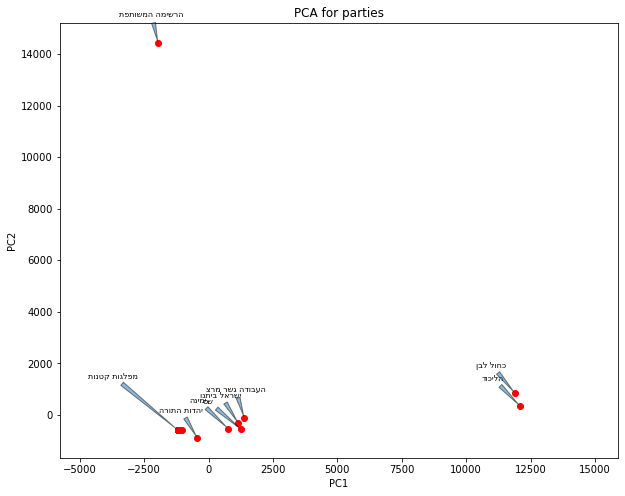

In [4]:
# creating a plot for PCA by parties
small= 'מפלגות קטנות'
small =small[::-1]
plt.figure(figsize=(10,8))
for i in range(30):
    if df_ballots.T.index[i] in dict_party.keys() :
        plt.scatter(X_pca[i,0],X_pca[i,1],color="r")    
        plt.annotate(dict_party[df_ballots.T.index[i]][::-1], (X_pca[i,0],X_pca[i,1]), xytext=(X_pca[i,0]-1500, X_pca[i,1]+1000), 
        arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5),size=8)
    else:
        plt.scatter(X_pca[i,0],X_pca[i,1],color="r")

plt.annotate(small, (X_pca[28,0],X_pca[28,1]), xytext=(X_pca[28,0]-3500, X_pca[28,1]+2000), 
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5),size=8)
plt.title('PCA for parties')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.show()




In [5]:
pd.DataFrame(X_pca).iloc[:,[0,1]]

,0,1
0,1381.627336,-112.260560
1,-437.704239,-901.854753
2,-1964.655742,14441.648151
3,-1167.199279,-599.623801
4,-1198.293947,-602.110202
5,-1199.678944,-603.090354
6,755.895600,-533.614296
7,-1197.297904,-602.361155
8,-1197.530926,-601.610350
9,-1199.524964,-588.910201


#### תשובה:
ציר Y יכול להתפרש כמספר היישובים בהם קיבלה המפלגה את רוב הקולות<br>
ציר X של הרכיב הראשון יוכל להתפרש כמספר הקולות שקיבלה המפלגה

#### סעיף ב)

In [6]:
# Normalize the data set to have rows with norm=1
df_ballots_norm =  df_ballots.T.drop('זץ')
df_ballots_norm = pd.DataFrame(sklearn.preprocessing.normalize(df_ballots_norm),index=df_ballots_norm.index,columns=df_ballots_norm.T.index)
pca2 = PCA(n_components=29)
XN_pca=pca2.fit_transform(df_ballots_norm)

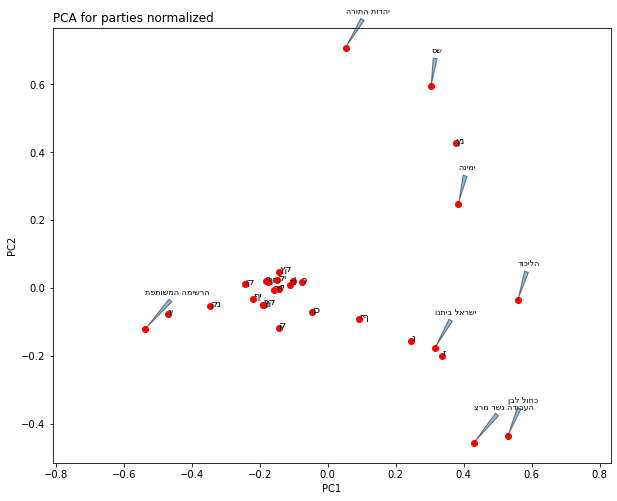

In [7]:
# ploting the PCA with normalize data
plt.figure(figsize=(10,8))
for i in range(29):
    if df_ballots_norm.index[i] in dict_party.keys() : 
        plt.scatter(XN_pca[i,0],XN_pca[i,1],color="r")    
        plt.annotate(dict_party[df_ballots_norm.index[i]][::-1], (XN_pca[i,0],XN_pca[i,1]), xytext=(XN_pca[i,0], XN_pca[i,1]+0.1), 
        arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5),size=8)
    else:
        plt.scatter(XN_pca[i,0],XN_pca[i,1],color="r")
        plt.annotate(df_ballots_norm.index[i][::-1], (XN_pca[i,0],XN_pca[i,1]))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.title('PCA for parties normalized',loc="left")
plt.show()


#### תשובה:
הקרבה בין המפלגות השתנתה שכן בפעולת הנרמול נשאר רק הכיוון ולא הגודל.<br>
כמו כן,מיקום המפלגות הגרץ השתנה ולהכן אנו מניחים שמשמעות הצירים השתנתה בהתאם.

In [8]:
# Merging the eshkol_hevrati_calcali data set with our ballots data set
social_rate =pd.read_excel('eshkol_hevrati_calcali.xlsx', encoding = 'iso-8859-8')
social_rate.rename(columns={'name':'שם ישוב'}, inplace=True)
merged = pd.merge(df_ballots,social_rate ,how='inner', on='שם ישוב')
df_votes = merged.iloc[:, 0:31]
df_votes=df_votes.set_index('שם ישוב')
df_votes = df_votes.iloc[:,0:31]


df_votes_norm = df_votes.T.drop('זץ')
df_votes_norm = pd.DataFrame(sklearn.preprocessing.normalize(df_votes_norm,axis=0),index=df_votes_norm.index,columns=df_votes_norm.T.index)



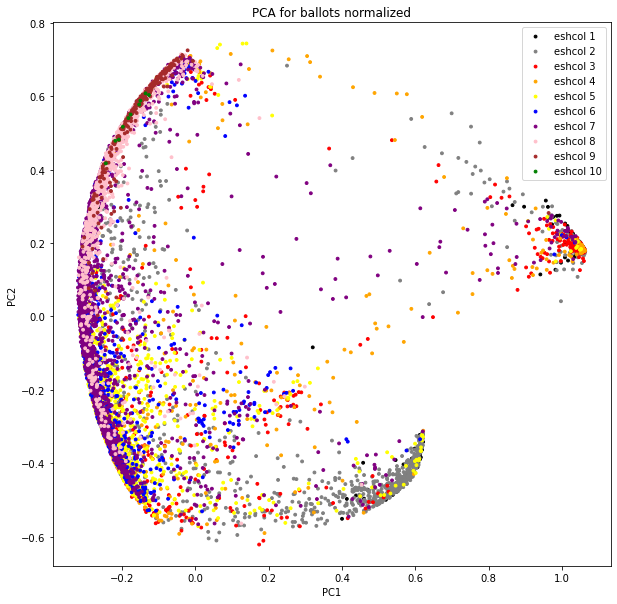

In [9]:
# Creating PCA for the ballots 
pca3 = PCA(n_components=29)
XN2_pca=pca3.fit_transform(df_votes_norm.T)
col_dict = {1:'black',2:'grey',3:"red",4:'orange',5:'yellow',6:"blue",7:"purple",8:'pink',9:"brown",10:"green"}
inverse_dict = {'black':1,"grey":2,"red":3,"orange":4,"yellow":5,"blue":6,"purple":7,"pink":8,"brown":9,"green":10}
col=[]
for i in range(0,len(list(merged.eco_level))):
    col.append(col_dict[list(merged.eco_level)[i]])

ddf= pd.DataFrame([XN2_pca[:,0],XN2_pca[:,1],col],index=["pc1","pc2","col"],columns=df_votes_norm.columns)
ddf = ddf.T       
plt.figure(figsize=(10,10))
for i in col_dict.values():
    plt.scatter(ddf[ddf.col==i].loc[:,"pc1"],ddf[ddf.col==i].loc[:,"pc2"],s=8,c=ddf[ddf.col==i].loc[:,"col"],label="eshcol"+" "+str(inverse_dict[i]))
plt.legend()    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.title('PCA for ballots normalized')
plt.show()

In [10]:
display(ddf.sort_values("pc2"))
display(ddf.sort_values("pc1"))

,pc1,pc2,col
שם ישוב,,,
לוד,0.174366,-0.621376,red
לוד,0.185951,-0.610987,red
צפת,0.0580449,-0.610444,grey
צפת,0.036956,-0.604681,grey
צפת,0.115,-0.595323,grey
...,...,...,...
בית חירות,-0.0203986,0.725075,brown
כפר כמא,0.0603092,0.731277,yellow
כפר כמא,0.0676697,0.740777,yellow


,pc1,pc2,col
שם ישוב,,,
ראשון לציון,-0.31925,0.0974304,purple
יקנעם עילית,-0.319157,0.078812,purple
חיפה,-0.318419,0.0454778,purple
נתניה,-0.318374,0.00447155,blue
פתח תקווה,-0.318281,0.0563268,purple
...,...,...,...
טמרה,1.06194,0.17799,grey
כאבול,1.06221,0.178442,grey
טייבה,1.06237,0.179104,red


#### תשובה:
ציר Y יכול להתפרש כמדד חברתי כלכלי<br>
ציר X יכול להתפרש כמדד לשוני דמוגרפי

In [11]:
ddf= pd.DataFrame([XN2_pca[:,0],XN2_pca[:,1],col],index=["pc1","pc2","col"],columns=df_votes_norm.columns)
ddf = ddf.T

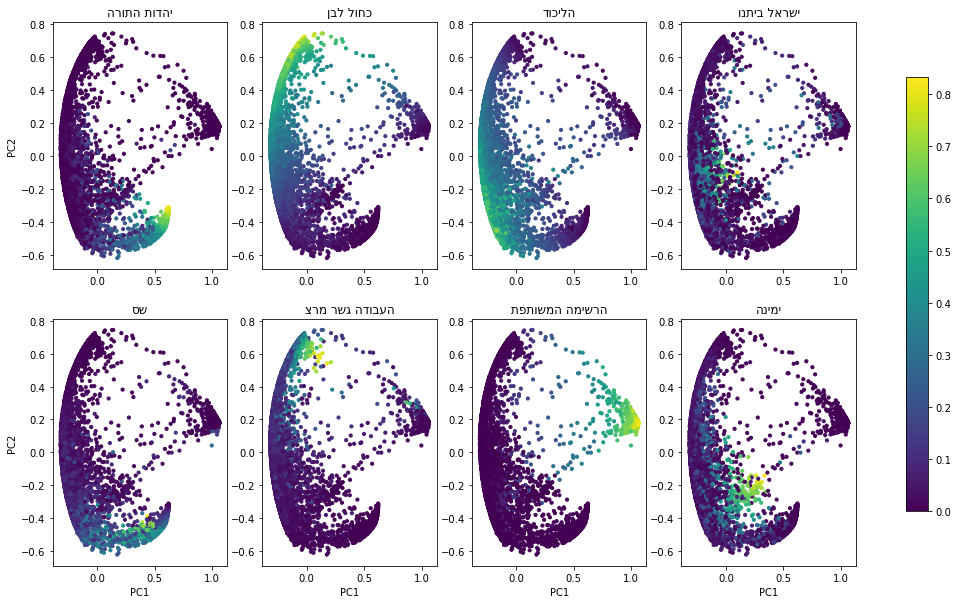

In [12]:
# Creating 8 plots(one for each party) which describe the ballot "sapport" of the party 
df_ballots2 = pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_kosher = df_ballots2["כשרים"]
df_kosher
big_8=merged.loc[:,["ג","פה","מחל","ל","שס",'אמת',"ודעם","טב"]]
kosher2=merged.iloc[:,1:31].sum(axis=1)
fig,ax = plt.subplots(2,4,figsize=(18,10))
for i in range(2):
    for j in range(4):
        if i==0:    
            im=ax[i,j].scatter(ddf.loc[:,"pc1"],ddf.loc[:,"pc2"],s=10,c=big_8.iloc[:,j]/kosher2,label=big_8.columns[j])
            ax[i,j].set_title(dict_party[big_8.columns[j]][::-1])
            if j==0:
                ax[i,j].set_ylabel('PC2')    
        else:
            im=ax[i,j].scatter(ddf.loc[:,"pc1"],ddf.loc[:,"pc2"],s=10,c=big_8.iloc[:,4+j]/kosher2,label=big_8.columns[4+j])
            ax[i,j].set_title(dict_party[big_8.columns[j+4]][::-1])
            ax[i,j].set_xlabel('PC1')
            if j==0:
                ax[i,j].set_ylabel('PC2')
fig.colorbar(im, ax=ax, shrink=0.8)
plt.show()



#### תשובה:
המפלגות שבחרנו הן העבודה-גשר-מרצ ויהודת התורה.<br>
**העבודה גשר מרצ**<br>
לפי הגרף ניתן לראות שמרבית המצביעים למפלגה זו הגיעו מישובים באשכול חברתי כלכלי 8-10<br>
**יהדות התודה**:<br>
לפי הגרף נראה כי מרבית המצביעים למפלגה זו הגיעו מאשכול חברתי כלכלי 1-3

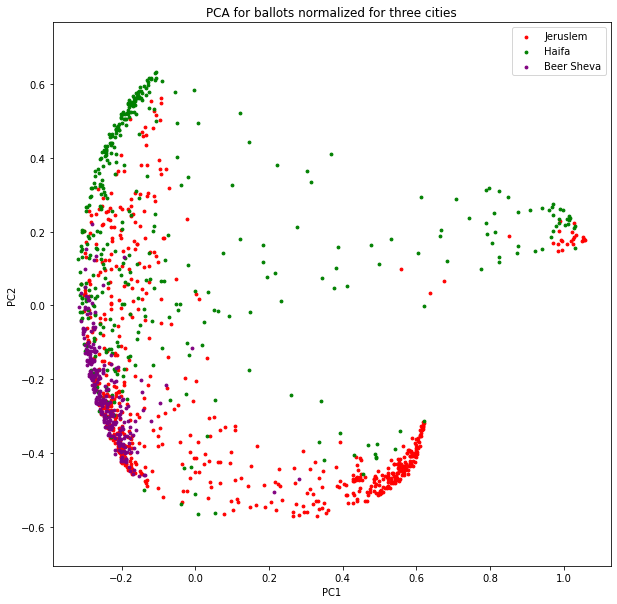

In [13]:
# ploting 3 cities ballots distribution
plt.figure(figsize=(10,10))
plt.scatter(ddf.loc["ירושלים",:].loc[:,"pc1"],ddf.loc["ירושלים",:].loc[:,"pc2"],s=8,c="red",label="Jeruslem")
plt.scatter(ddf.loc["חיפה",:].loc[:,"pc1"],ddf.loc["חיפה",:].loc[:,"pc2"],s=8,c="green",label="Haifa")
plt.scatter(ddf.loc["באר שבע",:].loc[:,"pc1"],ddf.loc["באר שבע",:].loc[:,"pc2"],s=8,c="purple",label="Beer Sheva")
plt.legend()    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.title('PCA for ballots normalized for three cities')
plt.show()

#### תשובה:
ניתן להראות כי בחיפה ובירושלים ישנן קלפיות שנמצאות מחוץ לאשכול בו נמצאות מרבית הקלפיות השייכות לאותה עיר(כנראה בגלל המרכיבים הדמוגרפים של חיפה וירושלים)<br>
כמו כן, בבאר שבע ניתן לראות שהרוב המוחלט של הקלפיות מאוגד באשכול אחד

#### שאלה 3

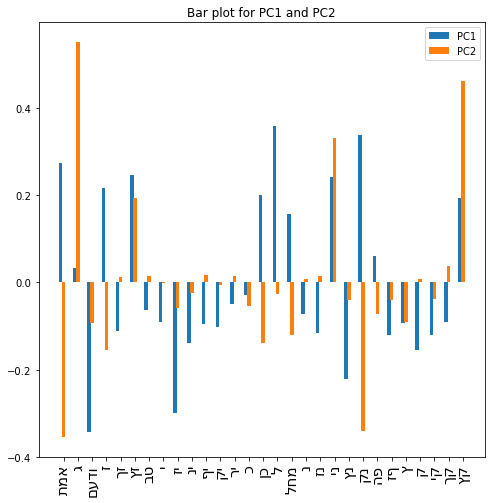

In [14]:
# ploting a bar plot of the first and second PC
XN_norm_pca1=XN_pca[:,0]/np.linalg.norm(XN_pca[:,0])
XN_norm_pca2=XN_pca[:,1]/np.linalg.norm(XN_pca[:,1])
fig,ax=plt.subplots(figsize=(8,8))
ax.bar(np.arange(29),height=XN_norm_pca1,width=0.25,align='center',label="PC1")
ax.bar(np.arange(29)+0.2,height=XN_norm_pca2,width=0.25,align='center',label="PC2")
ax.set_xticks(np.arange(29)+0.2)
ax.set_xticklabels([i[::-1] for i in df_ballots.T.index],rotation=90,size=15)
ax.set_title("Bar plot for PC1 and PC2")
ax.legend()
plt.show()

#### תשובה:
המפלגות המושפעות ביותר מהרכיב הראשון הינן העבודה-גשר-מרצ,ישראל ביתינו,מתקדמת(נק) והרשימה המשותפת<br>
המפלגות המושפעות ביותר מהרכיב השני הינן מפלגת יהדות התורה,העבודה גשר מרצ,מתקדמת(נק),קמ"ה(ני),ומפלגת משפט צדק לרפורמה במערכת המשפט(קץ)

#### סעיף ב)

0.9712732203259616

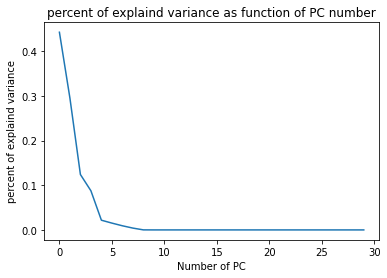

In [15]:
# a plot of explaind variance as a function of PC number
plt.plot(pca.explained_variance_/sum(pca.explained_variance_))
plt.xlabel("Number of PC")
plt.ylabel("percent of explaind variance")
plt.title("percent of explaind variance as function of PC number")


aa=pca.explained_variance_/sum(pca.explained_variance_)
sum(aa[0:5])

In [16]:
pd.DataFrame(aa)

,0
0,4.426168e-01
1,2.952125e-01
2,1.240743e-01
3,8.762359e-02
4,2.174613e-02
5,1.526300e-02
6,9.268338e-03
7,4.083102e-03
8,8.878785e-05
9,4.998870e-06


#### תשובה:
אנו נמליץ להוריד את המימד ל5 שכן חמשת הרכיבים הראשיים הראשונים מסבירים למעלה מ97% מהשונות